In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DhakaDaily.csv to DhakaDaily.csv


In [ ]:
# Load the dataset
df = pd.read_csv("DhakaDaily.csv")
df.head()

,Date,TempMax,TempMin,TempMean,RelHumMax,RelHumMin,RelHumMean,WindGustMax,WindGustMin,WindGustMean,WindSpeedMax,WindSpeedMin,WindSpeedMean,SunShDurMin,ShWaveRad,UVRad,Evapotranspiration,zone
0,2014-01-02T00:00:00,25.600426,12.240426,18.155424,94.579930,50.815685,79.60046,6.2,3.1,4.204167,2.707397,1.552418,2.151222,643.38180,4382,466.08000,1.92960,NaN
1,2014-01-03T00:00:00,23.050425,11.370426,16.619590,97.318700,47.404877,76.39005,6.7,3.2,4.470833,2.780288,1.676306,2.273954,639.53937,4540,469.00003,2.21040,NaN
2,2014-01-04T00:00:00,23.050425,11.590426,15.811260,97.971664,51.919422,82.92639,6.5,2.7,4.304167,2.402082,1.697056,2.066819,632.07730,4516,469.73000,1.90224,NaN
3,2014-01-05T00:00:00,22.810425,11.910426,15.826259,97.267784,56.197530,84.28297,5.4,2.2,3.791667,2.549510,1.300000,1.926554,505.73710,4358,465.78998,1.87056,NaN
4,2014-01-06T00:00:00,21.390425,12.350426,16.073760,99.875690,63.875580,87.65372,4.6,1.9,3.154166,2.080865,0.424264,1.458186,127.57086,2380,261.61002,1.01808,NaN


In [ ]:
# Convert 'Date' to datetime objects to extract time-based features
df['Date'] = pd.to_datetime(df['Date'])

# Extract time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['DayOfYear'] = df['Date'].dt.dayofyear


# Features and target
X = df[['Year', 'Month', 'DayOfWeek', 'DayOfYear']].copy() # Use the new time-based features
y = df['TempMean'].copy()

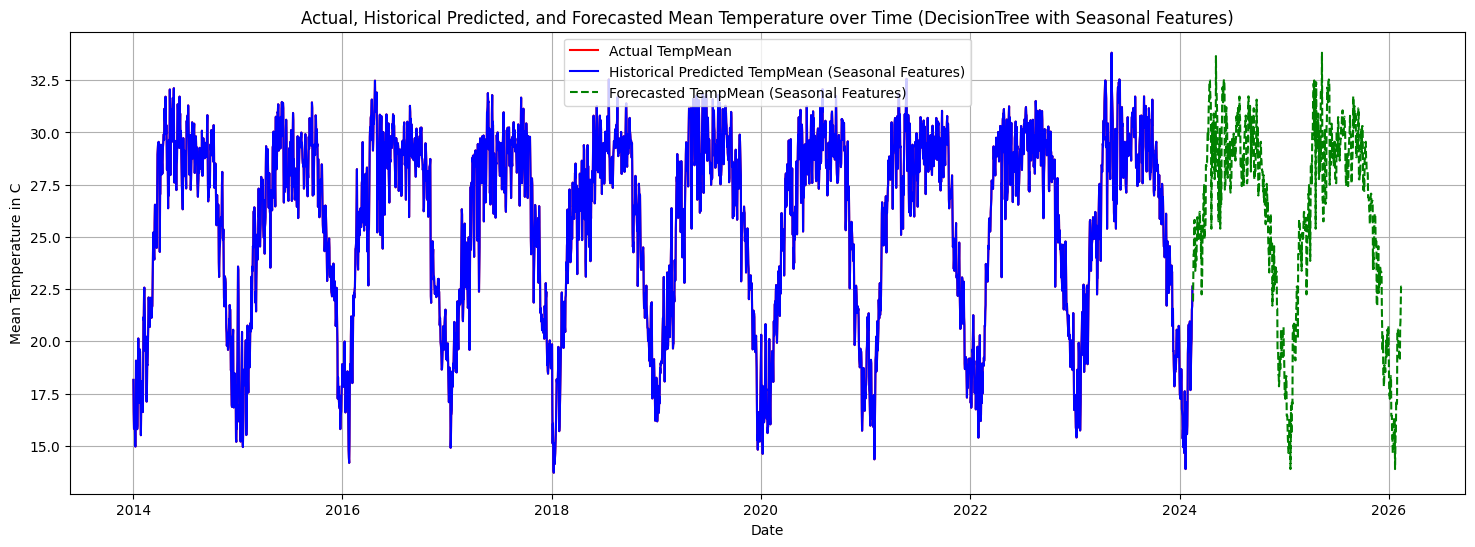

In [ ]:
# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
X = imputer.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# K-Fold Cross Validation (optional, but good for evaluation)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create and train the XGBoost regression model with enhanced features
f_model_seasonal = DecisionTreeRegressor(random_state=42)
f_model_seasonal.fit(X, y)

# Make predictions on the training data for plotting
y_pred_historical = f_model_seasonal.predict(X)

# --- Forecast for the next 2 years ---
# Create future dates for the next 2 years (assuming daily data)
last_date_dt = df['Date'].max()
future_dates_dt = pd.date_range(start=last_date_dt + pd.Timedelta(days=1), periods=365*2, freq='D')

# Create a DataFrame for future dates and extract time-based features
future_df = pd.DataFrame({'Date': future_dates_dt})
future_df['Year'] = future_df['Date'].dt.year
future_df['Month'] = future_df['Date'].dt.month
future_df['DayOfWeek'] = future_df['Date'].dt.dayofweek
future_df['DayOfYear'] = future_df['Date'].dt.dayofyear


# Preprocess future dates using the same imputer and scaler fitted on historical data
future_X = future_df[['Year', 'Month', 'DayOfWeek', 'DayOfYear']].copy()
future_X_imputed = imputer.transform(future_X) # Use the imputer fitted on historical data
future_X_scaled = scaler.transform(future_X_imputed) # Use the scaler fitted on historical data


# Make predictions for the future dates
future_predictions = f_model_seasonal.predict(future_X_scaled)

# Create a DataFrame for the forecasted data
forecast_df_seasonal = pd.DataFrame({'Date': future_dates_dt, 'Predicted TempMean': future_predictions})

# Plot historical data, historical predictions, and forecasted data
plt.figure(figsize=(18, 6))
plt.plot(df['Date'], y, label='Actual TempMean', color='red')
plt.plot(df['Date'], y_pred_historical, label='Historical Predicted TempMean (Seasonal Features)', color='blue')
plt.plot(forecast_df_seasonal['Date'], forecast_df_seasonal['Predicted TempMean'], label='Forecasted TempMean (Seasonal Features)', color='green', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Mean Temperature in C')
plt.title('Actual, Historical Predicted, and Forecasted Mean Temperature over Time (DecisionTree with Seasonal Features)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dhaka_Jan-1972-to-Jan-2025.csv to Dhaka_Jan-1972-to-Jan-2025.csv


In [ ]:
# Load the dataset
df = pd.read_csv("Dhaka_Jan-1972-to-Jan-2025.csv")
df.head()

,date,TempMax,TempMin,TempMean,RelHumMax,RelHumMin,RelHumMean
0,1/1/1972,26.92,13.72,19.767,90.249,38.230,66.266
1,1/2/1972,24.65,12.33,18.825,93.620,43.909,68.214
2,1/3/1972,24.15,14.32,18.549,94.320,39.953,68.290
3,1/4/1972,24.47,11.29,18.124,94.066,38.128,69.626
4,1/5/1972,24.85,12.31,17.808,94.992,42.912,72.677


In [ ]:
# Convert 'Date' to datetime objects to extract time-based features
df['date'] = pd.to_datetime(df['date'])

# Extract time-based features
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['DayOfWeek'] = df['date'].dt.dayofweek
df['DayOfYear'] = df['date'].dt.dayofyear


# Features and target
X = df[['Year', 'Month', 'DayOfWeek', 'DayOfYear']].copy() # Use the new time-based features
y = df['TempMean'].copy()

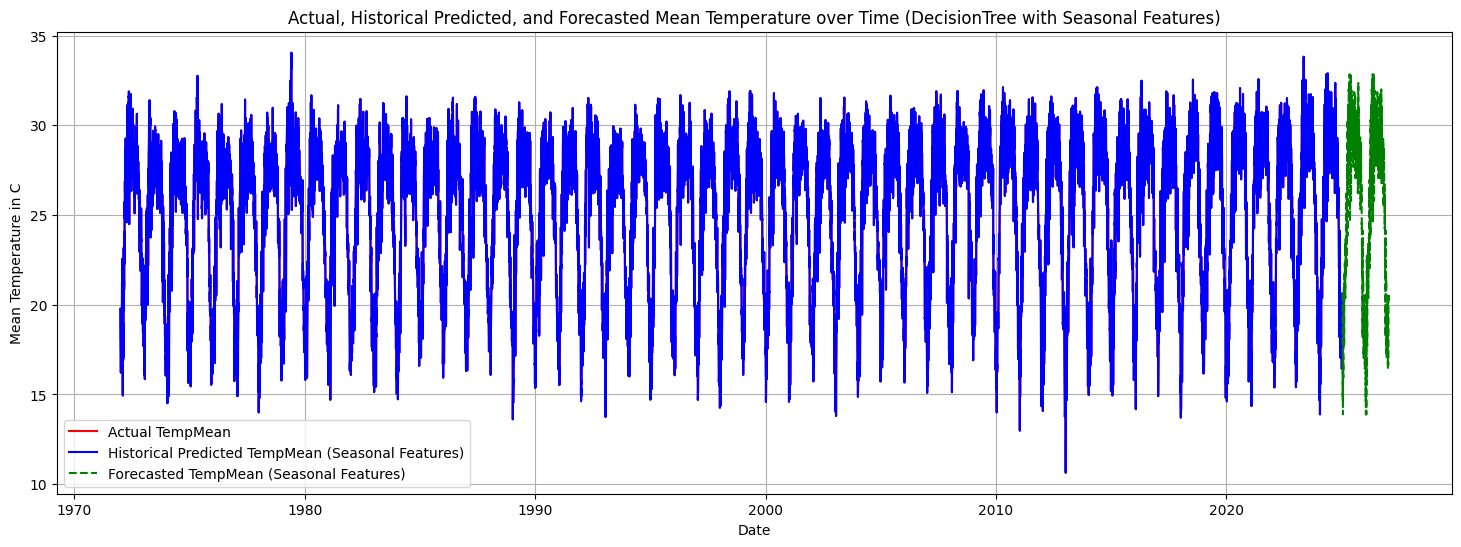

In [ ]:
# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
X = imputer.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# K-Fold Cross Validation (optional, but good for evaluation)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create and train the Decision Tree regression model with enhanced features
# Re-using the model name f_model_seasonal from the previous analysis for consistency
f_model_seasonal = DecisionTreeRegressor(random_state=42)
f_model_seasonal.fit(X, y)

# Make predictions on the training data for plotting
y_pred_historical = f_model_seasonal.predict(X)

# --- Forecast for the next 2 years ---
# Create future dates for the next 2 years (assuming daily data)
last_date_dt = df['date'].max()
future_dates_dt = pd.date_range(start=last_date_dt + pd.Timedelta(days=1), periods=365*2, freq='D')

# Create a DataFrame for future dates and extract time-based features
future_df = pd.DataFrame({'date': future_dates_dt})
future_df['Year'] = future_df['date'].dt.year
future_df['Month'] = future_df['date'].dt.month
future_df['DayOfWeek'] = future_df['date'].dt.dayofweek
future_df['DayOfYear'] = future_df['date'].dt.dayofyear


# Preprocess future dates using the same imputer and scaler fitted on historical data
future_X = future_df[['Year', 'Month', 'DayOfWeek', 'DayOfYear']].copy()
future_X_imputed = imputer.transform(future_X) # Use the imputer fitted on historical data
future_X_scaled = scaler.transform(future_X_imputed) # Use the scaler fitted on historical data


# Make predictions for the future dates
future_predictions = f_model_seasonal.predict(future_X_scaled)

# Create a DataFrame for the forecasted data
forecast_df_seasonal = pd.DataFrame({'Date': future_dates_dt, 'Predicted TempMean': future_predictions})

# Plot historical data, historical predictions, and forecasted data
plt.figure(figsize=(18, 6))
plt.plot(df['date'], y, label='Actual TempMean', color='red')
plt.plot(df['date'], y_pred_historical, label='Historical Predicted TempMean (Seasonal Features)', color='blue')
plt.plot(forecast_df_seasonal['Date'], forecast_df_seasonal['Predicted TempMean'], label='Forecasted TempMean (Seasonal Features)', color='green', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Mean Temperature in C')
plt.title('Actual, Historical Predicted, and Forecasted Mean Temperature over Time (DecisionTree with Seasonal Features)')
plt.legend()
plt.grid(True)
plt.show()